<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.444526,48.968522,26.850989,-0.020290,153.243748,153.259821,-0.016073
1,0.0,1.0,21.530543,30.273242,36.813555,0.022381,98.639721,98.618544,0.021177
2,0.0,2.0,56.354033,31.655356,55.768761,-0.003300,153.774850,153.777865,-0.003015
3,0.0,3.0,38.547423,93.440550,83.288751,0.006270,225.282994,225.280951,0.002043
4,0.0,4.0,70.877339,20.116707,32.272260,0.013752,133.280059,133.262270,0.017789
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.048890,63.384604,40.318169,0.008123,191.759785,191.751489,0.008296
119996,999.0,116.0,87.332267,67.983452,81.838622,-0.013483,247.140858,247.153625,-0.012767
119997,999.0,117.0,53.831039,84.627370,42.914784,0.000684,191.373877,191.373631,0.000247
119998,999.0,118.0,65.263270,49.526063,26.762432,-0.013793,151.537972,151.551922,-0.013951


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    67.444526  48.968522  26.850989 -0.020290  153.243748   
      1.0    21.530543  30.273242  36.813555  0.022381   98.639721   
      2.0    56.354033  31.655356  55.768761 -0.003300  153.774850   
      3.0    38.547423  93.440550  83.288751  0.006270  225.282994   
      4.0    70.877339  20.116707  32.272260  0.013752  133.280059   
...                ...        ...        ...       ...         ...   
999.0 115.0  78.048890  63.384604  40.318169  0.008123  191.759785   
      116.0  87.332267  67.983452  81.838622 -0.013483  247.140858   
      117.0  53.831039  84.627370  42.914784  0.000684  191.373877   
      118.0  65.263270  49.526063  26.762432 -0.013793  151.537972   
      119.0  50.018072  23.171768  93.012435 -0.022090  176.180186   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.259821 -0.016073  
      1.0     98.618544  0.021177  
      2.0    153.777865 -0.003015  
      3.0    225.280951  0.002043  
      4.0    133.262270  0.017789  
...                 ...       ...  
999.0 115.0  191.751489  0.008296  
      116.0  247.153625 -0.012767  
      117.0  191.373631  0.000247  
      118.0  151.551922 -0.013951  
      119.0  176.202066 -0.021880  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    67.444526  48.968522  26.850989 -0.020290  153.243748   
      1.0    21.530543  30.273242  36.813555  0.022381   98.639721   
      2.0    56.354033  31.655356  55.768761 -0.003300  153.774850   
      3.0    38.547423  93.440550  83.288751  0.006270  225.282994   
      4.0    70.877339  20.116707  32.272260  0.013752  133.280059   
...                ...        ...        ...       ...         ...   
999.0 115.0  78.048890  63.384604  40.318169  0.008123  191.759785   
      116.0  87.332267  67.983452  81.838622 -0.013483  247.140858   
      117.0  53.831039  84.627370  42.914784  0.000684  191.373877   
      118.0  65.263270  49.526063  26.762432 -0.013793  151.537972   
      119.0  50.018072  23.171768  93.012435 -0.022090  176.180186   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.259821 -0.016073  
      1.0     98.618544  0.021177  
      2.0    153.777865 -0.003015  
      3.0    225.280951  0.002043  
      4.0    133.262270  0.017789  
...                 ...       ...  
999.0 115.0  191.751489  0.008296  
      116.0  247.153625 -0.012767  
      117.0  191.373631  0.000247  
      118.0  151.551922 -0.013951  
      119.0  176.202066 -0.021880  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.444526,48.968522,26.850989,-0.020290,153.243748,153.259821,-0.016073
1,0.0,1.0,21.530543,30.273242,36.813555,0.022381,98.639721,98.618544,0.021177
2,0.0,2.0,56.354033,31.655356,55.768761,-0.003300,153.774850,153.777865,-0.003015
3,0.0,3.0,38.547423,93.440550,83.288751,0.006270,225.282994,225.280951,0.002043
4,0.0,4.0,70.877339,20.116707,32.272260,0.013752,133.280059,133.262270,0.017789
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.048890,63.384604,40.318169,0.008123,191.759785,191.751489,0.008296
119996,999.0,116.0,87.332267,67.983452,81.838622,-0.013483,247.140858,247.153625,-0.012767
119997,999.0,117.0,53.831039,84.627370,42.914784,0.000684,191.373877,191.373631,0.000247
119998,999.0,118.0,65.263270,49.526063,26.762432,-0.013793,151.537972,151.551922,-0.013951


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    67.444526  48.968522  26.850989 -0.020290  153.243748   
      1.0    21.530543  30.273242  36.813555  0.022381   98.639721   
      2.0    56.354033  31.655356  55.768761 -0.003300  153.774850   
      3.0    38.547423  93.440550  83.288751  0.006270  225.282994   
      4.0    70.877339  20.116707  32.272260  0.013752  133.280059   
...                ...        ...        ...       ...         ...   
999.0 115.0  78.048890  63.384604  40.318169  0.008123  191.759785   
      116.0  87.332267  67.983452  81.838622 -0.013483  247.140858   
      117.0  53.831039  84.627370  42.914784  0.000684  191.373877   
      118.0  65.263270  49.526063  26.762432 -0.013793  151.537972   
      119.0  50.018072  23.171768  93.012435 -0.022090  176.180186   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.259821 -0.016073  
      1.0     98.618544  0.021177  
      2.0    153.777865 -0.003015  
      3.0    225.280951  0.002043  
      4.0    133.262270  0.017789  
...                 ...       ...  
999.0 115.0  191.751489  0.008296  
      116.0  247.153625 -0.012767  
      117.0  191.373631  0.000247  
      118.0  151.551922 -0.013951  
      119.0  176.202066 -0.021880  

[120000 rows x 7 columns]

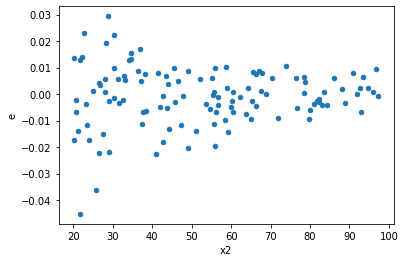

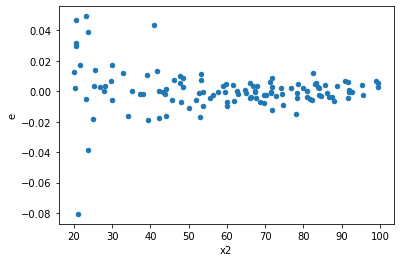

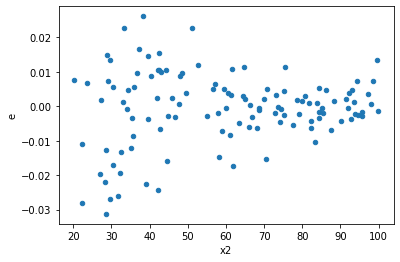

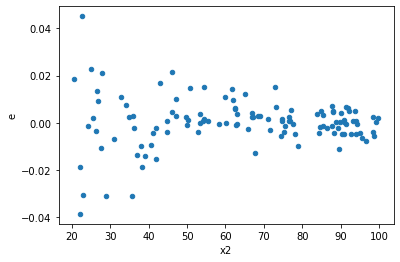

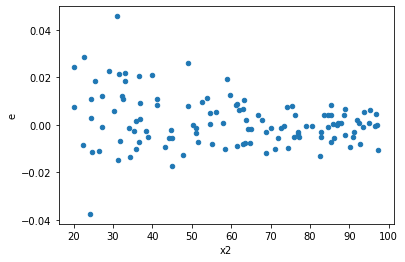

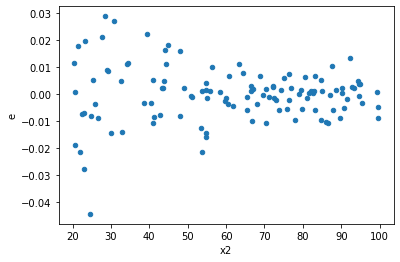

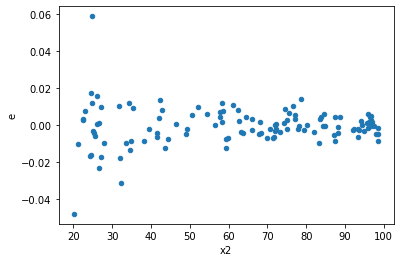

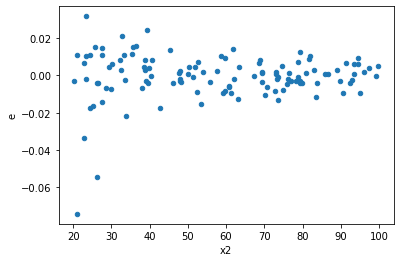

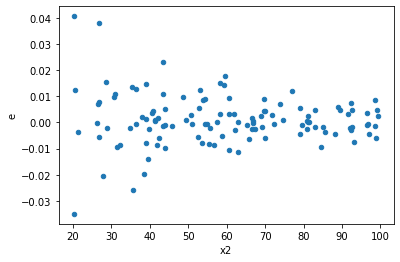

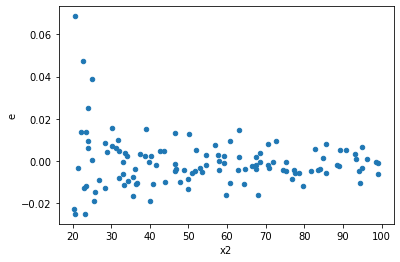

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,55.0,59.0,0.0028251494969845797,0.009750355702847787,5.136635449062872e-05,0.0001652602661499625,3.217286252621112,1.6773295546945732e-05,0.9999916133522265,8.386647773472866e-06,Reject005=0 : Heteroscedasticity
1.0,61.0,53.0,0.0026878630613977788,0.0201811622280562,4.406332887537342e-05,0.00038077664581238115,8.641576919650154,2.702282841937631e-13,0.9999999999998649,1.3511414209688155e-13,Reject005=0 : Heteroscedasticity
2.0,63.0,51.0,0.004099285085265663,0.00873442582040515,6.506801722643909e-05,0.00017126325138049314,2.6320650095190503,0.0004916870493520964,0.999754156475324,0.0002458435246760482,Reject005=0 : Heteroscedasticity
3.0,65.0,49.0,0.0030697996709810266,0.008810812664449302,4.7227687245861944e-05,0.0001798125033561082,3.8073535640232574,3.0978258218627985e-06,0.9999984510870891,1.5489129109313993e-06,Reject005=0 : Heteroscedasticity
4.0,52.0,62.0,0.002455518101603009,0.010435843484438243,4.7221501953904014e-05,0.00016832005620061682,3.5644790876182846,2.5923279127759713e-06,0.9999987038360436,1.2961639563879856e-06,Reject005=0 : Heteroscedasticity
6.0,50.0,64.0,0.002056958158928458,0.010554582497148472,4.1139163178569154e-05,0.00016491535151794487,4.008719156539749,2.8016817510412295e-07,0.9999998599159124,1.4008408755206148e-07,Reject005=0 : Heteroscedasticity
9.0,55.0,59.0,0.003110906626710169,0.013845436682828305,5.656193866745762e-05,0.00023466841835302212,4.148875089531477,2.168024644255695e-07,0.9999998915987678,1.0840123221278475e-07,Reject005=0 : Heteroscedasticity
16.0,67.0,47.0,0.0053629409947069,0.004693010242845279,8.004389544338657e-05,9.98512817626655e-05,1.2474565513030071,0.42587876317498896,0.7870606184125055,0.21293938158749448,Reject005=1 : Homoscedasticity
19.0,63.0,51.0,0.0055814631275879845,0.009507655733991203,8.85946528188569e-05,0.00018642462223512164,2.1042423702059154,0.006806160367486491,0.9965969198162568,0.0034030801837432456,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,55.0,59.0,0.0028251494969845797,0.009750355702847787,5.136635449062872e-05,0.0001652602661499625,3.217286252621112,1.6773295546945732e-05,Reject005=0 : Heteroscedasticity
1.0,61.0,53.0,0.0026878630613977788,0.0201811622280562,4.406332887537342e-05,0.00038077664581238115,8.641576919650154,2.702282841937631e-13,Reject005=0 : Heteroscedasticity
2.0,63.0,51.0,0.004099285085265663,0.00873442582040515,6.506801722643909e-05,0.00017126325138049314,2.6320650095190503,0.0004916870493520964,Reject005=0 : Heteroscedasticity
3.0,65.0,49.0,0.0030697996709810266,0.008810812664449302,4.7227687245861944e-05,0.0001798125033561082,3.8073535640232574,3.0978258218627985e-06,Reject005=0 : Heteroscedasticity
4.0,52.0,62.0,0.002455518101603009,0.010435843484438243,4.7221501953904014e-05,0.00016832005620061682,3.5644790876182846,2.5923279127759713e-06,Reject005=0 : Heteroscedasticity
5.0,50.0,64.0,0.008329320055318255,0.0036618686657724693,0.0001665864011063651,5.721669790269483e-05,0.3434655981682567,0.0001395162228389464,Reject005=0 : Heteroscedasticity
6.0,50.0,64.0,0.002056958158928458,0.010554582497148472,4.1139163178569154e-05,0.00016491535151794487,4.008719156539749,2.8016817510412295e-07,Reject005=0 : Heteroscedasticity
7.0,57.0,57.0,0.012382414777453367,0.005243332070711235,0.00021723534697286608,9.198828194230238e-05,0.42344988154157176,0.0014618320138719957,Reject005=0 : Heteroscedasticity
8.0,65.0,49.0,0.008727866619198124,0.002067901942645276,0.00013427487106458652,4.220208046214849e-05,0.3142961905496762,1.5730099676347695e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    846
Reject005=1 : Homoscedasticity      154
Name: Result_test, dtype: int64